In [1]:
! pip install numpy h5py pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt

Load the data (in h5 format)

In [3]:
Data1  = h5.File('COMPAS_Output.h5')

Inspect the data

In [4]:
list(Data1.keys())

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_RLOF',
 'BSE_System_Parameters',
 'Run_Details']

In [5]:
CE1 = Data1['BSE_Common_Envelopes']
list(CE1.keys())
merger = CE1['Merger'][()]
print(merger.shape)                   # number of systems in this file
print(merger[:5])                    # the values of the first 3 entries

(7035,)
[1 1 1 1 1]


In [6]:
SP1 = Data1['BSE_System_Parameters']

In [7]:
list(SP1.keys())

['ID',
 'Luminosity(1)',
 'Luminosity(2)',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Record_Type',
 'SEED',
 'Teff(1)',
 'Teff(2)']

Finding the unit of a parameter

In [8]:
print(SP1['Teff(1)'].attrs['units']) # attrs refers to attributes

b'K'


In [9]:
print(SP1['Luminosity(1)'].attrs['units'])

b'Lsol'


In [10]:
L1 = SP1['Luminosity(1)'][()]
print(L1.shape)                   # number of systems in this file
print(L1[:5])                    # the values of the first 3 entries

(1000,)
[2.85990019e-03 2.98030991e+03 2.66177705e-04 4.30871628e-03
 2.10066078e+04]


In [11]:
T1 = SP1['Teff(1)'][()]
print(T1.shape)                   # number of systems in this file
print(T1[:5])                    # the values of the first 3 entries

(1000,)
[352432.74969457  71865.29278679  13120.53041343  17641.87363253
  21735.85796817]


In [12]:
L2 = SP1['Luminosity(2)'][()]
T2 = SP1['Teff(2)'][()]

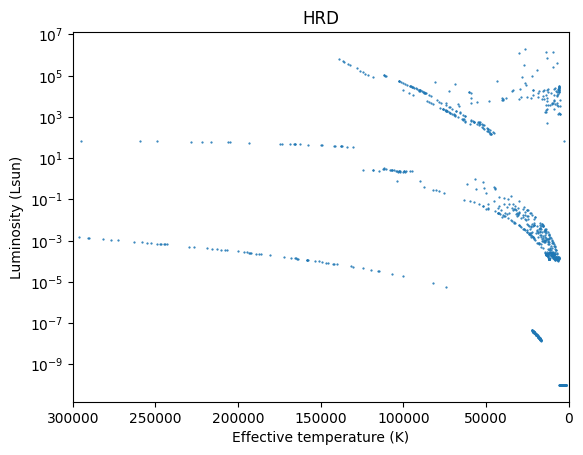

In [14]:
plt.scatter(T1, L1, s=0.3)
plt.xlim((0,0.3e6))
plt.gca().invert_xaxis()
plt.title('HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
